In [92]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [93]:
# import the dataset
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [94]:
# fetch the data
X = mnist["data"].values
y = mnist["target"].astype(np.uint8).values

In [96]:
type(X)

numpy.ndarray

In [6]:
# define function to print the images
def print_digit(index):
    example = X.loc[index].values
    example = example.reshape(28,28)
    plt.imshow(example, cmap='GnBu')
    plt.axis('off')

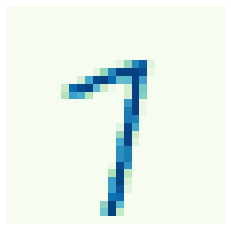

In [7]:
print_digit(42)

In [97]:
# split train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train set size:', X_train.shape)
print('Test set size:', X_test.shape)

Train set size: (56000, 784)
Test set size: (14000, 784)


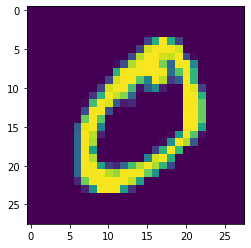

In [12]:
dummy = X.loc[1].values
dummy = dummy.reshape(28,28)
plt.imshow(dummy)

In [13]:
from scipy.ndimage import shift

In [42]:
def shift_digit(img, vector, fill_with=0.0):
    img = img.reshape(28,28)
    img_shifted = shift(img, vector, cval=fill_with)
    
    # return unrolled image array
    return img_shifted.flatten()

In [105]:
# convert dataset into list for performance
X_train_boost = list(X_train)
y_train_boost = list(y_train)

In [109]:
shift_n = 0
image_n = 0
train_size_original = X_train.shape[0]

# loop through images and shift them
for (dx, dy) in ((1,0), (0,1), (-1,0), (0,-1)):
    shift_n += 1
    for image, label in zip(X_train, y_train):
        row_shifted = shift_digit(image, (dx, dy))
        
        # append shifted image and label
        X_train_boost.append(row_shifted)
        y_train_boost.append(label)
        
        print('Currently shifted: shift', shift_n, '/4', image_n, '/', train_size_original, end="\r") 
        image_n += 1
    
    

In [112]:
# convert back to np arrays
X_train_boost = np.array(X_train_boost)
y_train_boost = np.array(y_train_boost)

8


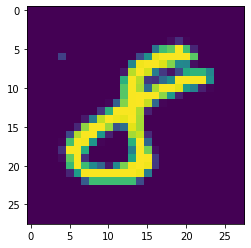

In [120]:
# check consistency of data augmentation
index = 250005
plt.imshow(X_train_boost[index].reshape(28,28))
print(y_train_boost[index])

In [121]:
# develop training model based on random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [123]:
classifier = RandomForestClassifier(random_state=42)
parameter_space = {'max_depth': [2,3,4,5]}
grid_search = GridSearchCV(classifier, parameter_space, cv=5, scoring="accuracy", return_train_score=True, verbose=3)

grid_search.fit(X_train_boost, y_train_boost)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....................................max_depth=2; total time= 1.7min
[CV 2/5] END ....................................max_depth=2; total time= 1.4min
[CV 3/5] END ....................................max_depth=2; total time= 1.5min
[CV 4/5] END ....................................max_depth=2; total time= 1.4min
[CV 5/5] END ....................................max_depth=2; total time= 1.4min
[CV 1/5] END ....................................max_depth=3; total time= 2.5min
[CV 2/5] END ....................................max_depth=3; total time= 2.1min
[CV 3/5] END ....................................max_depth=3; total time= 2.1min
[CV 4/5] END ....................................max_depth=3; total time= 2.0min
[CV 5/5] END ....................................max_depth=3; total time= 2.0min
[CV 1/5] END ....................................max_depth=4; total time= 3.2min
[CV 2/5] END ....................................

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5]}, return_train_score=True,
             scoring='accuracy', verbose=3)

In [125]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=5, random_state=42)

In [129]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_boost, y_train_boost)

DecisionTreeClassifier(random_state=42)

In [130]:
from sklearn.metrics import accuracy_score

accuracy_boosted = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy score with boosted dataset:", accuracy_boosted)

Accuracy score with boosted dataset: 0.908


In [131]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [132]:
accuracy_boosted = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy score with boosted dataset:", accuracy_boosted)

Accuracy score with boosted dataset: 0.8695
